In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo os conjuntos de dados contendo os resultados dos quantificadores

In [83]:
games = pd.read_csv('output/games.csv')
iphone = pd.read_csv('output/iphone.csv')
lg = pd.read_csv('output/lg.csv')
samsung = pd.read_csv('output/samsung.csv')
shoes = pd.read_csv('output/shoes.csv')
xiaomi = pd.read_csv('output/xiaomi.csv')

## Erro absoluto médio e desvio padrão dos resultados dos quantificadores para cada conjunto de dados

In [84]:
order = ['CC', 'ACC', 'MAX', 'T50', 'X', 'MS', 'HDy', 'SMM', 'SORD', 'DyS']
dfs = [iphone, samsung, xiaomi, shoes, games, lg]
dataset_names = ['Iphone', 'Samsung', 'Xiaomi', 'Shoes', 'Games', 'LG']
data = {'Dataset': order}
standard_deviation = {'Dataset': order}

for i, df in enumerate(dfs):
    df['quantifier'] = pd.Categorical(df['quantifier'], categories=order, ordered=True)
    data[dataset_names[i]] = df.groupby('quantifier', observed=False)['abs_error'].mean().round(3).to_list()
    standard_deviation[dataset_names[i]] = df.groupby('quantifier', observed=False)['abs_error'].std().round(3).to_list()

df_mae = pd.DataFrame(data)
df_mae

,Dataset,Iphone,Samsung,Xiaomi,Shoes,Games,LG
0,CC,0.087,0.066,0.067,0.079,0.112,0.128
1,ACC,0.045,0.039,0.038,0.055,0.072,0.052
2,MAX,0.044,0.038,0.044,0.055,0.072,0.063
3,T50,0.078,0.088,0.081,0.083,0.096,0.129
4,X,0.045,0.036,0.037,0.055,0.073,0.063
5,MS,0.038,0.034,0.035,0.048,0.062,0.053
6,HDy,0.074,0.062,0.068,0.064,0.077,0.171
7,SMM,0.063,0.050,0.051,0.069,0.097,0.105
8,SORD,0.038,0.034,0.035,0.049,0.063,0.052
9,DyS,0.056,0.048,0.051,0.056,0.071,0.137


### Cálculo do rank médio dos quantificadores para o erro absoluto médio

In [85]:
df_mae.set_index('Dataset', inplace=True)
df_mae['rank médio'] = df_mae.rank().mean(axis=1).round(3)
df_mae

,Iphone,Samsung,Xiaomi,Shoes,Games,LG,rank médio
Dataset,,,,,,,
CC,0.087,0.066,0.067,0.079,0.112,0.128,8.833
ACC,0.045,0.039,0.038,0.055,0.072,0.052,3.917
MAX,0.044,0.038,0.044,0.055,0.072,0.063,4.167
T50,0.078,0.088,0.081,0.083,0.096,0.129,9.167
X,0.045,0.036,0.037,0.055,0.073,0.063,4.167
MS,0.038,0.034,0.035,0.048,0.062,0.053,1.583
HDy,0.074,0.062,0.068,0.064,0.077,0.171,8.167
SMM,0.063,0.050,0.051,0.069,0.097,0.105,7.250
SORD,0.038,0.034,0.035,0.049,0.063,0.052,1.667


In [86]:
df_mae_std = pd.DataFrame(standard_deviation)
df_mae_std

,Dataset,Iphone,Samsung,Xiaomi,Shoes,Games,LG
0,CC,0.071,0.059,0.061,0.061,0.081,0.099
1,ACC,0.048,0.040,0.039,0.054,0.071,0.058
2,MAX,0.044,0.039,0.040,0.055,0.071,0.056
3,T50,0.087,0.090,0.080,0.087,0.096,0.118
4,X,0.046,0.037,0.037,0.055,0.071,0.056
5,MS,0.042,0.036,0.036,0.049,0.064,0.054
6,HDy,0.060,0.053,0.055,0.061,0.078,0.104
7,SMM,0.052,0.043,0.046,0.054,0.068,0.084
8,SORD,0.041,0.035,0.035,0.049,0.064,0.053
9,DyS,0.054,0.044,0.045,0.056,0.074,0.091


## Cálculo da acurácia média e desvio padrão da classificação ajustada baseada no resultado da quantificação para cada conjunto de dados

In [87]:
data = {'Dataset': order}
standard_deviation = {'Dataset': order}

for i, df in enumerate(dfs):
    df['quantifier'] = pd.Categorical(
        df['quantifier'], categories=order, ordered=True)
    data[dataset_names[i]] = df.groupby('quantifier', observed=False)[
        'accuracy'].mean().round(3).to_list()
    standard_deviation[dataset_names[i]] = df.groupby('quantifier', observed=False)[
        'accuracy'].std().round(3).to_list()
df_accuracy = pd.DataFrame(data)
df_accuracy

,Dataset,Iphone,Samsung,Xiaomi,Shoes,Games,LG
0,CC,0.893,0.921,0.924,0.869,0.819,0.853
1,ACC,0.917,0.936,0.942,0.892,0.855,0.885
2,MAX,0.920,0.938,0.938,0.893,0.855,0.891
3,T50,0.894,0.896,0.905,0.870,0.839,0.844
4,X,0.918,0.940,0.942,0.893,0.857,0.891
5,MS,0.922,0.939,0.944,0.897,0.862,0.892
6,HDy,0.908,0.923,0.922,0.889,0.857,0.822
7,SMM,0.905,0.928,0.931,0.876,0.829,0.871
8,SORD,0.923,0.939,0.945,0.896,0.862,0.893
9,DyS,0.917,0.932,0.934,0.893,0.859,0.852


In [88]:
# df_accuracy.set_index('Dataset', inplace=True)
df_accuracy['rank médio'] = df_accuracy.rank(ascending=False).mean(axis=1).round(3)
df_accuracy

,Dataset,Iphone,Samsung,Xiaomi,Shoes,Games,LG,rank médio
0,CC,0.893,0.921,0.924,0.869,0.819,0.853,9.000
1,ACC,0.917,0.936,0.942,0.892,0.855,0.885,5.929
2,MAX,0.920,0.938,0.938,0.893,0.855,0.891,4.571
3,T50,0.894,0.896,0.905,0.870,0.839,0.844,8.143
4,X,0.918,0.940,0.942,0.893,0.857,0.891,3.071
5,MS,0.922,0.939,0.944,0.897,0.862,0.892,2.286
6,HDy,0.908,0.923,0.922,0.889,0.857,0.822,7.500
7,SMM,0.905,0.928,0.931,0.876,0.829,0.871,7.000
8,SORD,0.923,0.939,0.945,0.896,0.862,0.893,1.714
9,DyS,0.917,0.932,0.934,0.893,0.859,0.852,5.786


In [89]:
df_accuracy_std = pd.DataFrame(standard_deviation)
df_accuracy_std

,Dataset,Iphone,Samsung,Xiaomi,Shoes,Games,LG
0,CC,0.070,0.059,0.060,0.064,0.075,0.095
1,ACC,0.060,0.048,0.048,0.070,0.081,0.073
2,MAX,0.056,0.047,0.049,0.067,0.080,0.069
3,T50,0.083,0.087,0.076,0.090,0.097,0.112
4,X,0.057,0.047,0.048,0.070,0.082,0.069
5,MS,0.058,0.046,0.047,0.067,0.080,0.070
6,HDy,0.067,0.056,0.059,0.073,0.085,0.106
7,SMM,0.058,0.049,0.054,0.063,0.070,0.083
8,SORD,0.058,0.046,0.047,0.067,0.080,0.069
9,DyS,0.062,0.052,0.052,0.070,0.083,0.093


In [90]:
df_mae_rank = df_mae.rank().T
df_mae_rank

Dataset,CC,ACC,MAX,T50,X,MS,HDy,SMM,SORD,DyS
Iphone,10.0,4.5,3.0,9.0,4.5,1.5,8.0,7.0,1.5,6.0
Samsung,9.0,5.0,4.0,10.0,3.0,1.5,8.0,7.0,1.5,6.0
Xiaomi,8.0,4.0,5.0,10.0,3.0,1.5,9.0,6.5,1.5,6.5
Shoes,9.0,4.0,4.0,10.0,4.0,1.0,7.0,8.0,2.0,6.0
Games,10.0,4.5,4.5,8.0,6.0,1.0,7.0,9.0,2.0,3.0
LG,7.0,1.5,4.5,8.0,4.5,3.0,10.0,6.0,1.5,9.0
rank médio,9.0,3.0,4.5,10.0,4.5,1.0,8.0,7.0,2.0,6.0


## Boxplot para visualizar o desempenho de cada quantificador

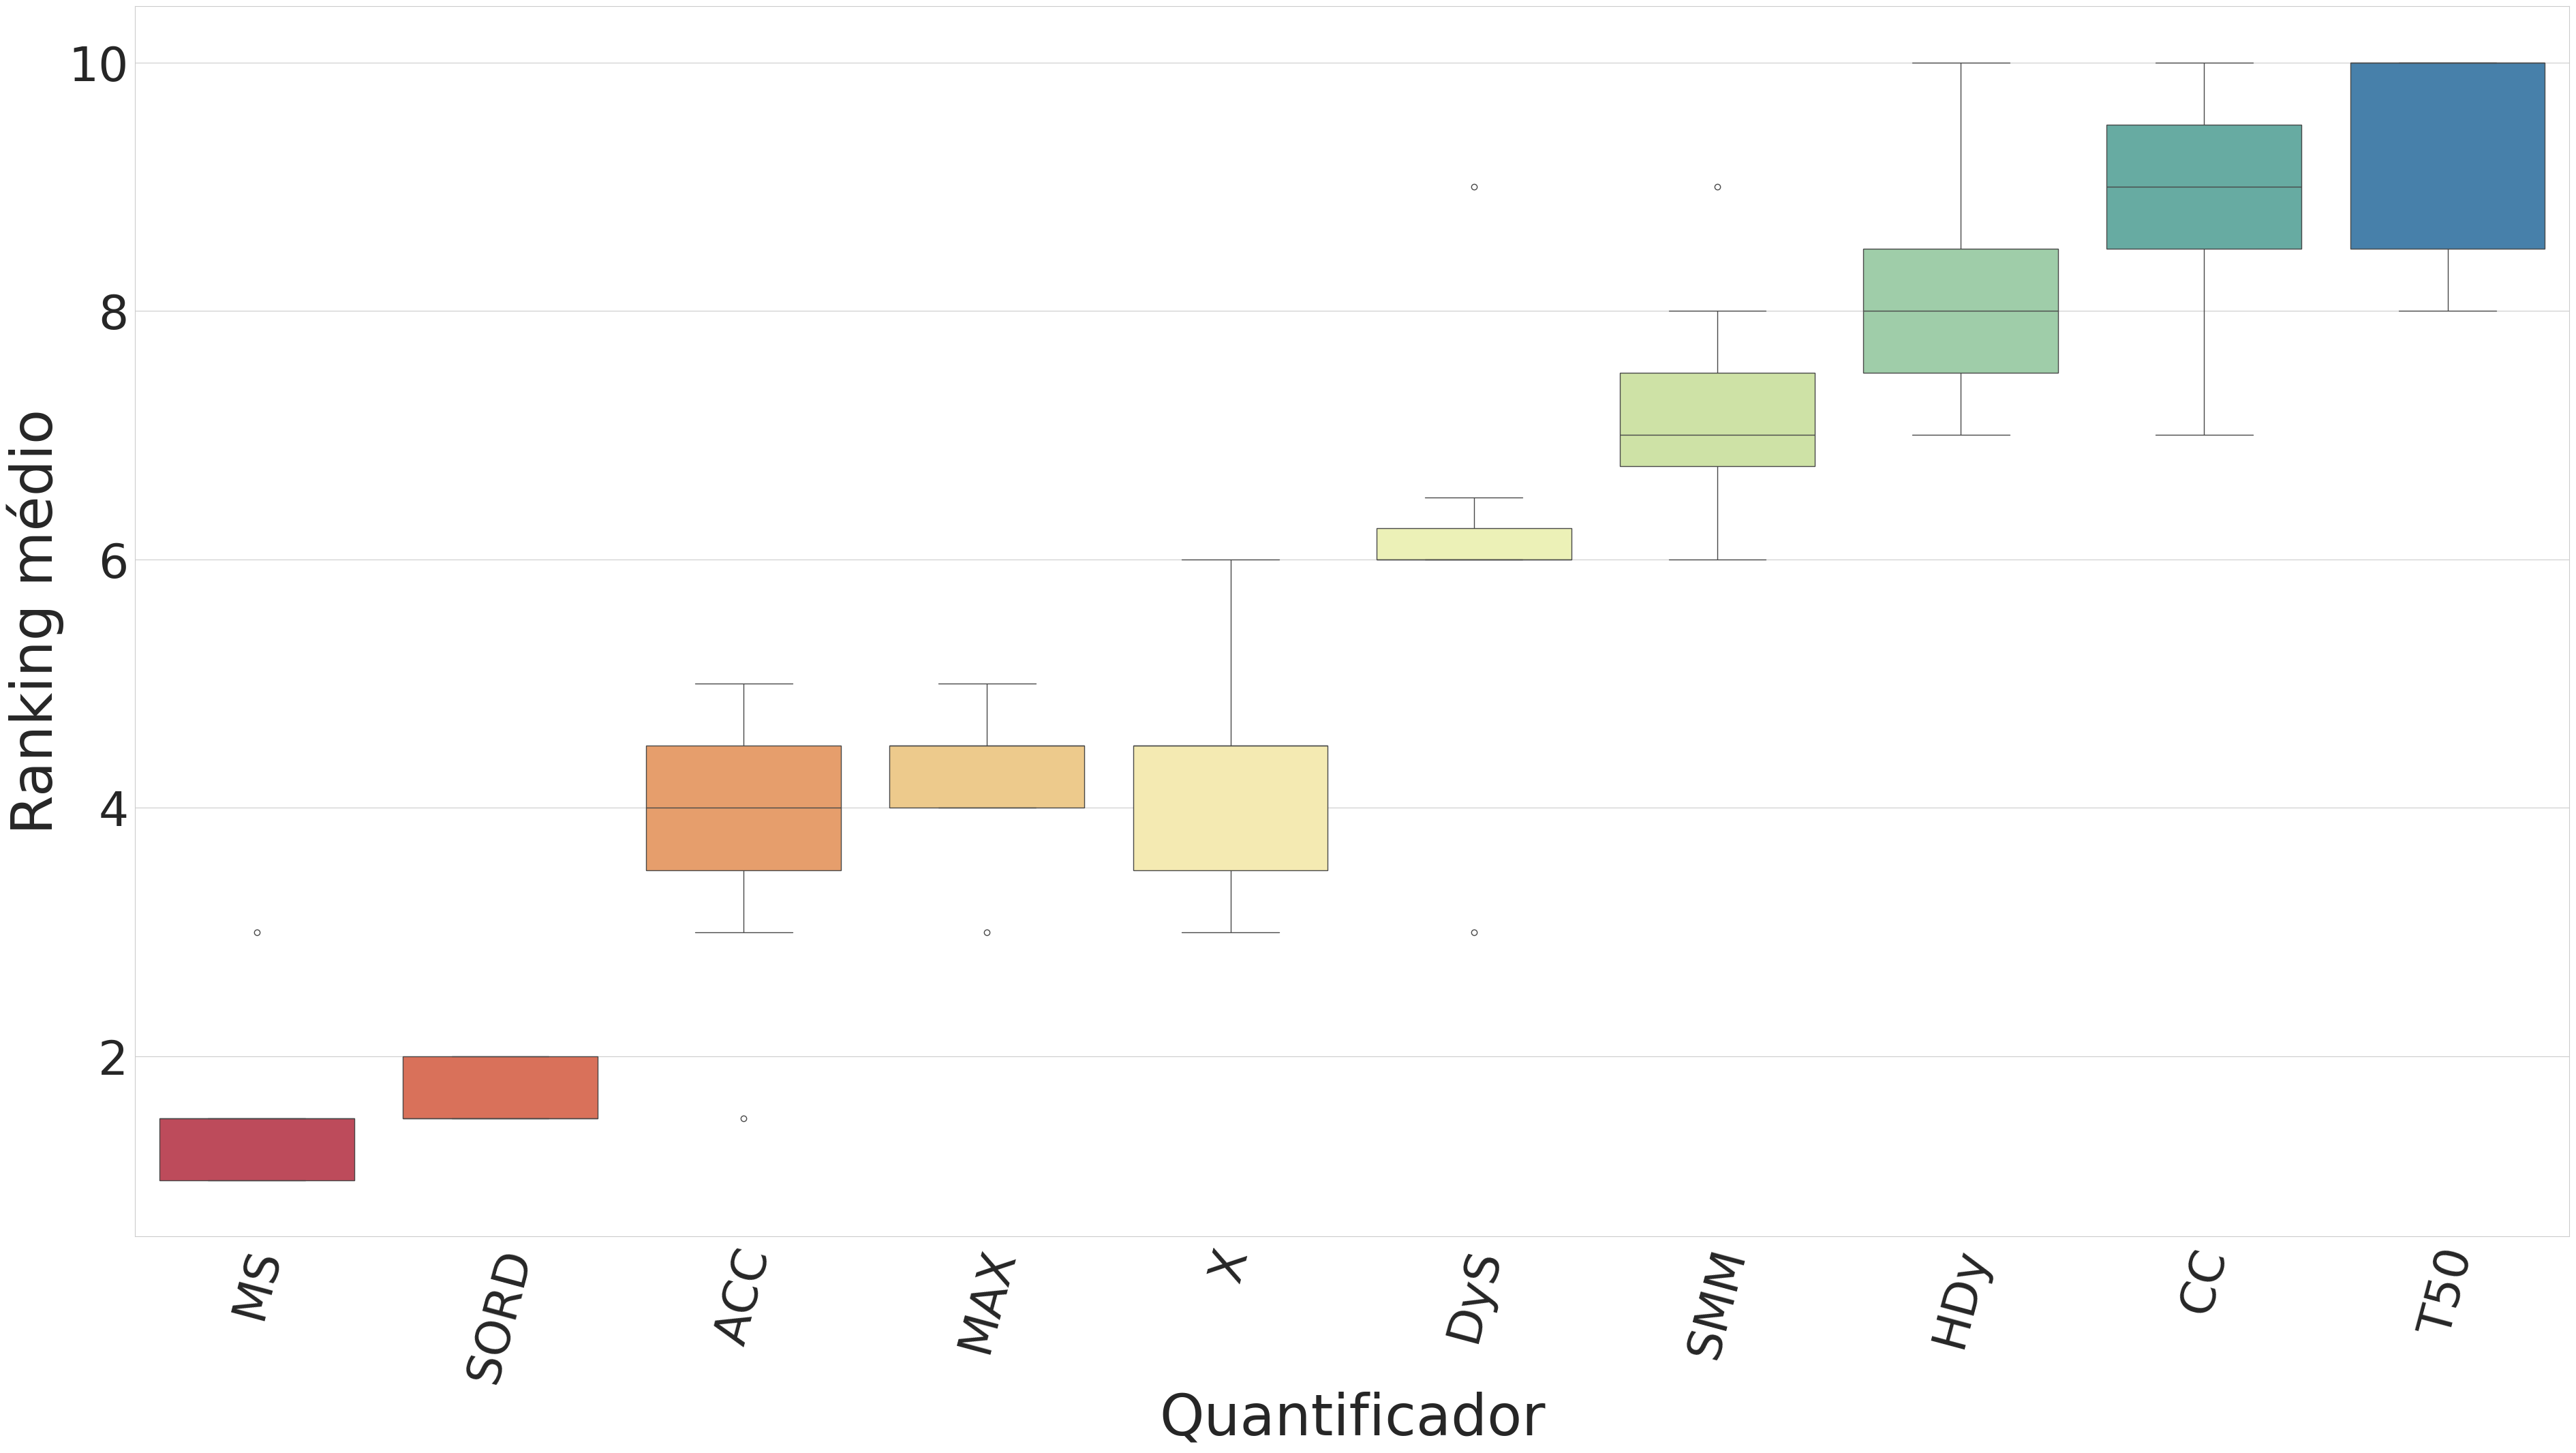

In [91]:
margin_left = 0.05
margin_right = 0.99
margin_top = 0.99
margin_bottom = 0.23
plt_width = 38
plt_height = 38 / 1.6
plot_rotation = 75
axis_font_size = 50
labels_size = 60
df_mae_rank = df_mae_rank[df_mae_rank.median().sort_values().index]
with sns.axes_style("whitegrid"), sns.color_palette('Spectral', df_mae_rank.shape[1]):
    plt.figure(figsize=(plt_width, plt_height))
    plt.subplots_adjust(left=margin_left, bottom=margin_bottom,
                        right=margin_right, top=margin_top)
    ax = sns.boxplot(data=df_mae_rank)

    plt.xticks(rotation=plot_rotation, fontsize=axis_font_size)
    plt.yticks(fontsize=axis_font_size)

    ax.set_xlabel('Quantificador', fontsize=labels_size)
    ax.set_ylabel('Ranking médio', fontsize=labels_size)

plt.savefig('boxplot.pdf', format='pdf')
plt.show()